# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
#test test test test

In [164]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [6]:
# code for solving the model (remember documentation and comments)

#a = np.array([1,2,3])
#b = inauguralproject.square(a)
#print(b)

# til en start prøver jeg at lave det med fixet løn
import numpy as np
import math
from scipy import optimize
def u_func(l, w, m=1, nu=10, epsilon=0.3, tau0=0.4, tau1=0.1, kappa=0.4):
    return math.log10( m+w*l-(tau0*w*l+tau1*max(w*l-kappa,0)) ) - nu*l**(1+1/epsilon)/(1+1/epsilon)

w=1
#l = 0.1
#u = u_func(l,w)

#print(u)

# modificeret kode fra 3. forelæsning
# a. objective funciton (to minimize)
def value_of_choice(l,w):
    return -u_func(l,w)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(w))

# c. unpack solution
l = sol_case1.x
u = u_func(l,w)
print(l)
print(u)

0.31772191243090864
0.059731396195159006


[0.5  0.75 1.   1.25 1.5 ]
[0.26575196 0.29581319 0.31772191 0.32000526 0.33173826]
[0.02591321 0.04250044 0.0597314  0.07687052 0.09083925]


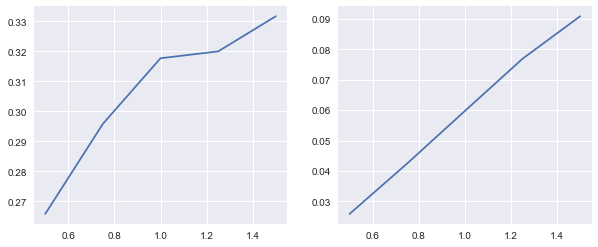

In [17]:
#opgave 2
#modificeret kode fra problem set 1
N = 5
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
u_vec = np.empty(N)

for i,w in enumerate(w_vec):
    w = w_vec[i]
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',bounds=(0,1),args=(w))
    l_vec[i] = sol_case1.x
    l=l_vec[i]
    u_vec[i] = u_func(l,w)

print(w_vec)
print(l_vec)
print(u_vec)

import matplotlib.pyplot as plt

plt.style.use("seaborn")

# a. create the figure
fig = plt.figure(figsize=(10,4))# figsize is in inches...

fig_w_l = fig.add_subplot(1,2,1)
fig_w_l.plot(w_vec,l_vec)

#ax_left.set_title('value of choice, $u(x_1,x_2)$')
#ax_left.set_xlabel('$x_1$')
#ax_left.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')
fig_w_l.grid(True)

fig_w_u = fig.add_subplot(1,2,2)
fig_w_u.plot(w_vec,u_vec)

#ax_left.set_title('value of choice, $u(x_1,x_2)$')
#ax_left.set_xlabel('$x_1$')
#ax_left.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')
fig_w_u.grid(True)

# Question 2

ADD ANSWER.

In [18]:
# code

# Question 3

ADD ANSWER.

In [19]:
# code

# Question 4

ADD ANSWER.

In [20]:
# code

# Question 5

ADD ANSWER.

In [21]:
# code

# Conclusion

ADD CONCISE CONLUSION.